In [1]:
import cv2
import glob, os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cal_images_path = 'cal_imgs'
pattern_size = (7,5)
cal_imgs_with_Corners = 'imgs_w_corners'
undistorted_imgs_path = 'imgs_undistorted'
!mkdir {cal_imgs_with_Corners}
!mkdir {undistorted_imgs_path}

mkdir: cannot create directory ‘imgs_w_corners’: File exists
mkdir: cannot create directory ‘imgs_undistorted’: File exists


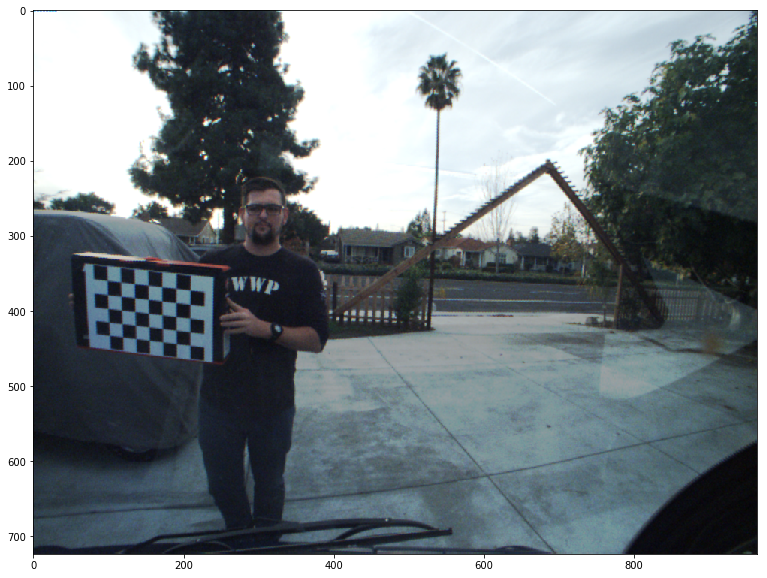

In [3]:
imgs_path = glob.glob(cal_images_path+'/image*.png')

img_path = imgs_path[0]
#read the image
img = cv2.imread(img_path)
# plot the image
plt.figure(figsize=(16,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
## find the corners of the checker board.

# turn the image to gray
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find corners
ret,corners = cv2.findChessboardCorners(img_gray,pattern_size)
print (ret)
print ('2 of the Corners:')
print (corners[:2])

True
2 of the Corners:
[[[ 99.49242 360.77316]]

 [[116.69986 362.1042 ]]]


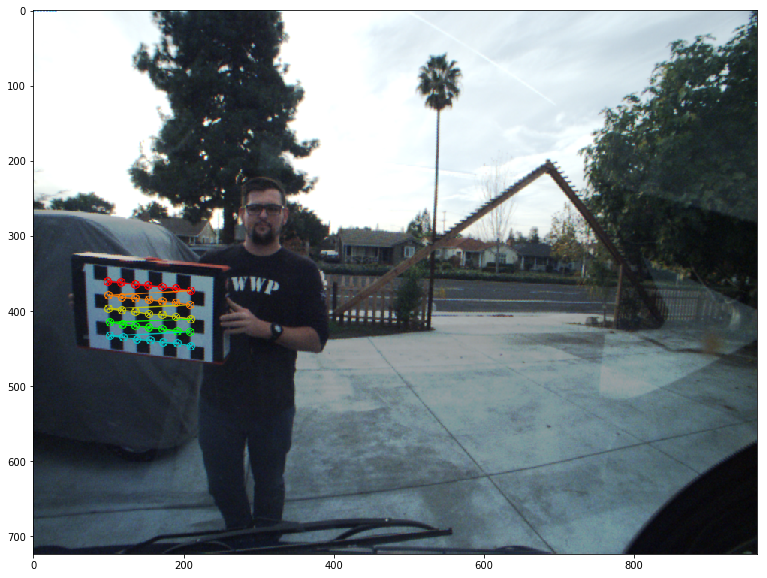

True

In [5]:
# Overlay the corners over the image
cv2.drawChessboardCorners(img,pattern_size,corners,ret)
plt.figure(figsize=(16,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# save image
cv2.imwrite(cal_imgs_with_Corners +'/' +os.path.basename(img_path),img)

In [6]:
# Do all above for the all images

obj_pts = []
img_pts = []

nx = pattern_size[0]
ny = pattern_size[1]
objp=np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

for img_path in imgs_path:
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(img_gray,pattern_size)
    if ret is False:
        print (img_path, "'s corners couldn't be found!")
    else:
        cv2.drawChessboardCorners(img,pattern_size,corners,ret)
        cv2.imwrite(cal_imgs_with_Corners +'/' +os.path.basename(img_path),img)
        obj_pts.append(objp)
        img_pts.append(corners)

cal_imgs/image014.png 's corners couldn't be found!


In [7]:
# Calibrate the Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, img_gray.shape[::-1], None, None)

print("Camera Matrix")
print(mtx)
print("Distortion parameters:")
print(dist)

Camera Matrix
[[487.46738529   0.         458.57846055]
 [  0.         485.48303131 372.73628683]
 [  0.           0.           1.        ]]
Distortion parameters:
[[-0.2247311   0.11839985  0.00156723  0.00077842 -0.02886818]]


In [8]:
# undistort Camera
for img_path in imgs_path:
    img = cv2.imread(img_path)
    img_undistorted = cv2.undistort(img, mtx, dist, None, None)
    cv2.imwrite(undistorted_imgs_path +'/' +os.path.basename(img_path),img_undistorted)

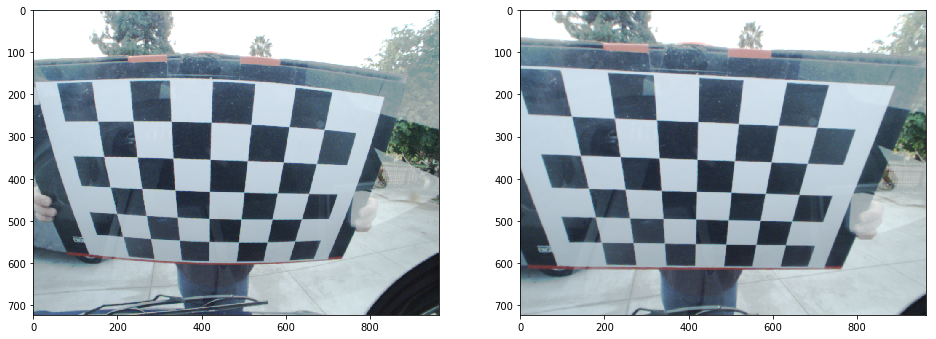

In [9]:
# Compare Distorted and undistorted image
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(plt.imread(cal_images_path + '/image013.png'))
plt.subplot(1,2,2)
plt.imshow(plt.imread(undistorted_imgs_path + '/image013.png'))
plt.show()

## Pose Estimation

True
[[ 0.42464611]
 [-0.03059396]
 [ 0.05536042]]
[[ 0.99803016 -0.06007194 -0.01808786]
 [ 0.04727867  0.9097053  -0.41255424]
 [ 0.04123756  0.4108864   0.91075344]]
[[-3.42069686]
 [-1.54723822]
 [ 5.66574812]]


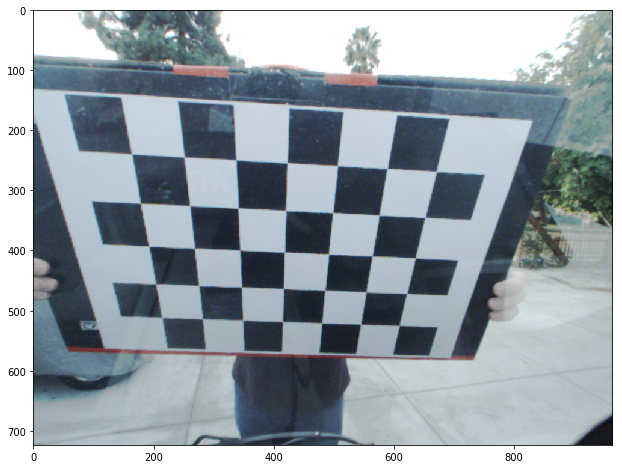

In [30]:
img_path=imgs_path[16]
img = cv2.imread(img_path)
ret,corners = cv2.findChessboardCorners(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),pattern_size)
if ret is True:
    #img = cv2.undistort(img, mtx, dist, None, None)
    ret, rvecs,tvecs = cv2.solvePnP(objp,corners,mtx,dist)
    print(ret)
    print(rvecs)
    rot_mat,_ = cv2.Rodrigues(rvecs)
    print(rot_mat)
    print(tvecs)
    plt.figure(figsize=(16,8))
    #plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(cv2.undistort(img, mtx, dist, None, None),cv2.COLOR_BGR2RGB))